In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

from torch.utils.data import Dataset

import pandas, random, numpy
import matplotlib.pyplot as plt

from PIL import Image, ImageOps


import glob
import PIL

from sklearn.model_selection import train_test_split

In [2]:
civs_path = r'C:\Users\clayp\OneDrive\Desktop\KNN Mini Project\T-shirts'

In [5]:
path  = civs_path

paths = glob.glob(path + "/*.jpg") # Grabbing all the image file names

n_images = len(paths)

rand_idxs = np.random.permutation(n_images)

paths_subset = np.random.choice(paths, n_images , replace=False) 
all_paths    = paths_subset[rand_idxs]

print(n_images)

10


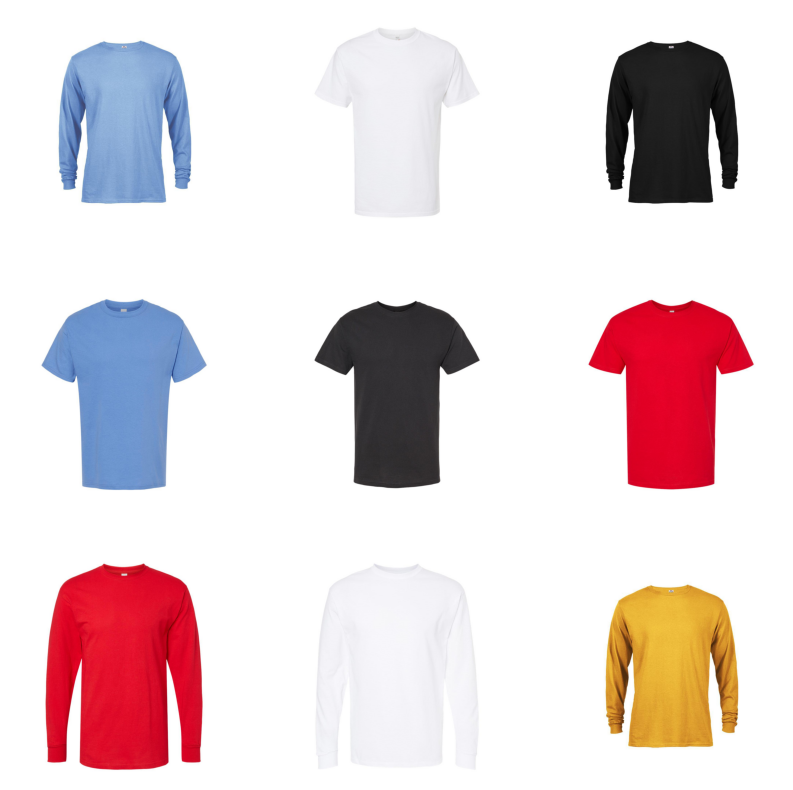

In [6]:
_, axes = plt.subplots(3, 3, figsize=(10, 10))

for ax, img_path in zip(axes.flatten(), all_paths):
    ax.imshow(Image.open(img_path))
    ax.axis("off")

In [15]:
def label_func2(fname):
    # Strip path and extension
    fname = fname.replace(r"C:\Users\clayp\OneDrive\Desktop\KNN Mini Project\T-shirts", "")
    fname = fname.replace(".jpg", "")
    fname = fname.replace("\\", "")  # remove backslashes left from path
    temp_name = fname.split("_")  # split the filename into parts

    # Extract features based on your naming convention
    sleeve_length = float(temp_name[1].replace("sleeve", ""))  # sleeve length
    color = float(temp_name[2].replace("color", ""))  # color

    # Return a list with the filename and extracted features
    return [fname, "tshirt", color, sleeve_length]

In [19]:
list_imgs = []
list_label_vectors = []

for img_name in all_paths:
    # Open the image file
    my_img = Image.open(img_name)
    
    # Resize image to the desired size
    my_img = my_img.resize((128, 128))  # Adjust the size as needed
    
    # Convert image to a NumPy array
    img_np = np.array(my_img)
    
    # Ensure that we have a 3D array for color images
    assert img_np.ndim == 3 and img_np.shape[2] == 3, "The image should have 3 channels (color)"

    # Get the label vector from the image filename using the adjusted label function
    temp_label_vector = label_func2(img_name)
    
    # Append the image array and the label vector to their respective lists
    list_imgs.append(img_np)
    list_label_vectors.append(temp_label_vector)
    
    print(list_imgs[0])

# Print label vectors for verification
for label_vector in list_label_vectors:
    print(label_vector)

# Print the shape of the images array
print(np.array(list_imgs).shape)

# Print the shape of the labels array
print(np.array(list_label_vectors).shape)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

In [20]:
X = []
y = []

for label_vector, img in zip(list_label_vectors, list_imgs):
   
    X.append(label_vector[1:])

    y.append(img)

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)  # Should be (number of images, number of features)
print("y shape:", y.shape)

X shape: (10, 3)
y shape: (10, 128, 128, 3)


In [21]:
from sklearn.model_selection import train_test_split

# Split the t-shirt dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Print the number of samples in each set for verification
print("Number of t-shirt samples in training set:", len(X_train))
print("Number of t-shirt samples in testing set:", len(X_test))
print("Number of t-shirt images in training set:", len(y_train))
print("Number of t-shirt images in testing set:", len(y_test))

Number of t-shirt samples in training set: 8
Number of t-shirt samples in testing set: 2
Number of t-shirt images in training set: 8
Number of t-shirt images in testing set: 2


In [22]:
X_train[0]

array(['tshirt', '4.0', '1.0'], dtype='<U32')

In [24]:
list_ids_train = []
list_features_train = []
list_imgs_train = []

for index in range(len(X_train)):
    # Extract the features (conditions) for the current t-shirt
    features = X_train[index]
    
    # Extract the image data for the current t-shirt
    img = y_train[index]
    
    # Extract the ID (filename) for the current t-shirt from the label vectors
    # Note: This assumes that the order of X_train and list_label_vectors is the same
    # You might need to adjust this if that's not the case
    id = list_label_vectors[index][0]

    # Append the extracted data to the respective lists
    list_ids_train.append(id)
    list_features_train.append(features)
    list_imgs_train.append(img)

# Print the lengths of the lists for verification
print("Training set - IDs:", len(list_ids_train), "Features:", len(list_features_train), "Images:", len(list_imgs_train))

Training set - IDs: 8 Features: 8 Images: 8


In [25]:
list_imgs_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [26]:
list_ids_test = []
list_features_test = []
list_imgs_test = []

for index in range(len(X_test)):
    # Extract the features (conditions) for the current t-shirt
    features = X_test[index]
    
    # Extract the image data for the current t-shirt
    img = y_test[index]
    
    # Extract the ID (filename) for the current t-shirt from the label vectors
    # Note: This assumes that the order of X_test and list_label_vectors is the same
    # You might need to adjust this if that's not the case
    id = list_label_vectors[index][0]

    # Append the extracted data to the respective lists
    list_ids_test.append(id)
    list_features_test.append(features)
    list_imgs_test.append(img)

# Print the lengths of the lists for verification
print("Testing set - IDs:", len(list_ids_test), "Features:", len(list_features_test), "Images:", len(list_imgs_test))

Testing set - IDs: 2 Features: 2 Images: 2


In [27]:
conditions_matrix_train = np.array( list_features_train )
conditions_matrix_test  = np.array( list_features_test )

In [28]:
print( conditions_matrix_train.shape )
print( conditions_matrix_test.shape  )

(8, 3)
(2, 3)


In [29]:
# Create a DataFrame from the conditions_matrix_train
DF_conditions_train = pd.DataFrame(conditions_matrix_train, columns=['Color', 'Sleeve Length'])

# Save the DataFrame to a CSV file
DF_conditions_train.to_csv("Tshirt_conditions_train.csv", index=False)

ValueError: Shape of passed values is (8, 3), indices imply (8, 2)

In [30]:
# Assuming list_ids_train contains the filenames or IDs for the training set t-shirts
DF_ids_train = pd.DataFrame(list_ids_train, columns=['ID'])

# Save the DataFrame to a CSV file with a name that reflects your t-shirt project
DF_ids_train.to_csv("Tshirt_ids_train.csv", index=False)

In [31]:
list_imgs_train[2]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [32]:
list_imgs_train[2].shape

(128, 128, 3)

In [33]:
list_imgs_train_stretched = [     the_img_np.reshape(-1)         for the_img_np in list_imgs_train ]

In [34]:
list_imgs_train_stretched[0]

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [35]:
list_imgs_train_stretched[4].shape

(49152,)

In [36]:
list_imgs_train_stretched[4][:1000]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

In [37]:
list_imgs_train_stretched[4].shape


(49152,)

In [38]:
np_list_imgs_train_stretched = np.array( list_imgs_train_stretched )  

In [39]:
np_list_imgs_train_stretched.shape

(8, 49152)

In [40]:
np_list_imgs_train_stretched[3]

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [41]:
DF_imgs_np_train = pd.DataFrame(np_list_imgs_train_stretched)

In [42]:
DF_imgs_np_train

,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
5,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
6,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
7,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [43]:
DF_imgs_np_train.to_csv("Tshirt_imgs_np_train.csv")

In [44]:
url1 = "Tshirt_ids_train.csv"
pd_ids_train = pd.read_csv(url1)
pd_ids_train_np = pd_ids_train.to_numpy()
pd_ids_train_np = pd_ids_train_np[1:, 1:]

In [47]:
url2 = "tshirt_features.csv"
pd_features_train = pd.read_csv(url2)
pd_features_train_np = pd_features_train.to_numpy()
# Assuming the first row is the header and the first column is an index or ID
pd_features_train_np = pd_features_train_np[1:, 1:]


FileNotFoundError: [Errno 2] No such file or directory: 'tshirt_features.csv'

In [48]:
url3 = "Fruits_imgs_np_train.csv"
pd_imgs_np_train = pd.read_csv(url3)
pd_imgs_np_train_np = pd_imgs_np_train.to_numpy()
pd_imgs_np_train_np      = pd_imgs_np_train_np[1:, 1:]

FileNotFoundError: [Errno 2] No such file or directory: 'Fruits_imgs_np_train.csv'

In [49]:
def euclidean_distance(v1, v2):
    return np.sqrt( np.sum(   (v1 - v2)**2   )   )

In [50]:
def predict(test_x):
    
    ## calculate distances between test_x and all dta samples in x
    ## this distances vector is a vector of 45 distances
    ## distances = [ euclidean_distance(test_x , x)  for x in X_train    ]

    distances = [ euclidean_distance(test_x, x )  for x in pd_conditions_train_np  ]
      
    
    ## distances - > [23, 3, 145, 17, ...]
    
    k = 3
    
    ## sort by distance value and return the k nearest neighbors
    ## np.argsort returns the indices of the k neares neighbors
    k_neighbor_indices = np.argsort(distances)[:k]
    print(k_neighbor_indices)
    
    
    ## with indices, extract labels from y_train 
    selected_imgs_to_avg = [ pd_imgs_np_train_np[i].reshape((140, 39))  for i in k_neighbor_indices  ]
    

    return selected_imgs_to_avg

In [51]:
np.set_printoptions(suppress=True)
print( conditions_matrix_test[:10, :] )

[['tshirt' '3.0' '2.0']
 ['tshirt' '2.0' '1.0']]


In [52]:
def generate_img_per_index(index):
    
    selected_imgs_to_avg = predict( conditions_matrix_test[  index  ] )
    the_test_conditions = conditions_matrix_test[  index  ]
    
    
    avg_gen_img = np.mean( np.array(selected_imgs_to_avg), axis=0 )
    avg_gen_img = avg_gen_img.astype(int)
    gen_pil_image = avg_gen_img
    
    real_my_img = np.array(list_imgs_test[index])
    real_pil_image = Image.fromarray(real_my_img)
    real_pil_image = ImageOps.grayscale(real_pil_image)
    
    print(gen_pil_image)
    print(real_pil_image)
    
    return the_test_conditions, gen_pil_image, real_pil_image

In [53]:
the_test_conditions, gen_pil_image, real_pil_image = generate_img_per_index(1)


the_test_conditions = the_test_conditions.astype(int)
str_conditions = np.array2string(the_test_conditions, precision=0, separator=',', suppress_small=True)
str_conditions = str_conditions.replace(" ","")
str_conditions = str_conditions.replace("[","")
str_conditions = str_conditions.replace("]","")

## print(str_conditions)
                 

fig, ax = plt.subplots(1,2)

ax[0].imshow(gen_pil_image)
ax[1].imshow(real_pil_image)

ax[0].set_title("Gen: " + str_conditions)
ax[1].set_title("real")

NameError: name 'pd_conditions_train_np' is not defined

In [54]:
for test_i in range( conditions_matrix_test.shape[0]  ):


    the_test_conditions, gen_pil_image, real_pil_image = generate_img_per_index(test_i)
    
    the_test_conditions = the_test_conditions.astype(int)
    str_conditions = np.array2string(the_test_conditions, precision=0, separator=',', suppress_small=True)
    str_conditions = str_conditions.replace(" ","")
    str_conditions = str_conditions.replace("[","")
    str_conditions = str_conditions.replace("]","")

    ## print(str_conditions)

    fig, ax = plt.subplots(1,2)
    ax[0].imshow(gen_pil_image)
    ax[1].imshow(real_pil_image)
    
    ax[0].set_title("Gen: " + str_conditions)
    ax[1].set_title("real")

NameError: name 'pd_conditions_train_np' is not defined